# Element Size
<p>In this notebook, I will test whether and how the size of the discretization element affects flow at a certain point. Specifically, I would like to tell whether or not I can substitute in a larger element for a smaller one near the middle of a larger part.</p>
<p>Because this model is pretty simplistic and this is just a first test, I will use 1-dimensional flow. Also, I assume that conductivity and specific storage are equal to 1 and also constant all over.</p>

In [39]:
import numpy as np
import matplotlib.pyplot as plt

def flow1D(heads,lengths):
    queue = np.zeros(heads.size)
    
    queue[:-1] += (heads[1:] - heads[:-1])/lengths[:-1]
    queue[1: ] += (heads[:-1] - heads[1:])/lengths[1:]
    heads += .1*queue
    return heads

<p>Now, I will test a system with total length 100. The first model will have 100 elements with equal length. The first element will be set to a constant head of 10, while the final will be set to a constant of 0. I will record the amount that flows into the final element as the metric.</p>

In [51]:
iters = 10000

firstHeads = np.zeros(100)
lengths1 = np.ones(100)
firstHeads[0] = 10
firstData = []

#print("Length of trial 1:",np.sum(lengths1))

for i in range(iters):
    firstHeads = flow1D(firstHeads,lengths1)
    firstData.append(firstHeads[-1])
    firstHeads[0] = 10
    firstHeads[-1] = 0

#------------------------------------------------
    
secondHeads = np.zeros(91)
secondHeads[0] = 10
lengths2 = np.ones(91)
lengths2[45] = 10
secondData = []

#print("Length of trial 2:",np.sum(lengths2))

for i in range(iters):
    secondHeads = flow1D(secondHeads, lengths2)
    secondData.append(secondHeads[-1])
    secondHeads[0] = 10
    secondHeads[-1] = 0
    
#-------------------------------------------------

thirdHeads = np.zeros(95)
thirdHeads[0] = 10
lengths3 = np.ones(95)
lengths3[46] = 6
thirdData = []

#print("Length of trial 3:",np.sum(lengths3))

for i in range(iters):
    thirdHeads = flow1D(thirdHeads,lengths3)
    thirdData.append(thirdHeads[-1])
    thirdHeads[-1] = 0
    thirdHeads[0] = 10


### Now, plot data and show results

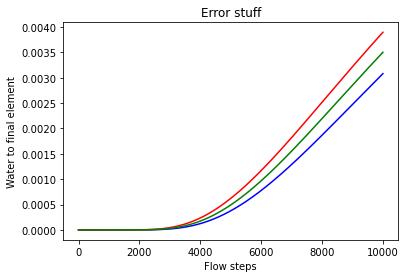

In [52]:
plt.xlabel("Flow steps")
plt.ylabel("Water to final element")
plt.title("Error stuff")
plt.plot(firstData, color = 'blue')
plt.plot(secondData, color = 'red')
plt.plot(thirdData, color = 'green')
plt.show()

## Some more error analysis things
<p>I'll find the difference between the models for multiple numbers of iterations</p>

In [71]:
error = 0
totalCount = 0

for i in range(iters):
    if (firstData[i] > 10e-4) or (secondData[i] > 10e-4):
        totalCount += 1
        error += abs(firstData[i]-secondData[i])
    else:
        continue
        
print(error)
print(totalCount)

print('Average error per iteration for',totalCount,'iterations:',error/totalCount)


2.639253237560441
4285
Average error per iteration for 4285 iterations: 0.0006159284101657972


## Some analysis
<p>So, this model proves that even using a single large box in the model to represent a group of other boxes <u>does</u>, in fact, have an impact on an element further down the line. Above, I measure the error quantitatively by averaging the total difference between the two models only when one had a nonzero value, and dividing by the total number of iterations that 1 of the values was greater than zero. Really, I only checked if the value that flowed to the final element was >= 10e-7. Really, this is not a large number. Using this amount as the threshold, the average error between the two models was .00038. This is not a huge amount. As to how this translates to reality, I cannot comment yet. If I increase the threshold to 10e-4, the error rises to .00062, which still is not large. But, it does represent ~20% of the value flowing into the final element.</p>